In [22]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
from utils import get_eval_stats, analyze_protein_gen_helper, analyze_protein_gen_helper_violin, plot_line_prot_comp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
color_bank = ['#6CA783', '#0C8CE1', '#8C33EB', "#DE9D12", "#C500C5", "#3C99A8"]

In [24]:
pretrained_file = 'data_full/baseline/pretrained/distribution/original_old_10_0.5_0_results_merge_old_baseline.csv'
df_pre = pd.read_csv(pretrained_file)
pre_stats = get_eval_stats(df_pre)

In [25]:
model = 'pretrained'
dataset = 'validation'
align_type = 'ddg'
align_strat = 'linear'
N = 10
lambda_vals = [0.0, 0.05, 0.01, 0.001, 0.0001, 0.005, 0.0005]
lambda_vals = sorted(lambda_vals)

ll_vals = []
ll_std = []
ddg_vals = []
ddg_std = []
for lam in lambda_vals: 
    fn = f"/home/shai/BLISS_Experiments/DRAKES/DRAKES/drakes_protein/fmif/eval_results/validation/{model}_{dataset}_{align_type}_{align_strat}_N={N}_lambda={lam}.csv"
    df = pd.read_csv(fn)
    stat = get_eval_stats(df, summary_func=np.mean)
    ll_vals.append(stat['ll'])
    ll_std.append(stat['ll_std'])
    ddg_vals.append(stat['ddg'])
    ddg_std.append(stat['ddg_std'])

best_ddg = max(ddg_vals)
best_ll = max(ll_vals)
print(f"Best DDG Lambda: {lambda_vals[ddg_vals.index(best_ddg)]}")
print(f"Best ProtGPT Lambda: {lambda_vals[ll_vals.index(best_ll)]}")

Best DDG Lambda: 0.0005
Best ProtGPT Lambda: 0.0


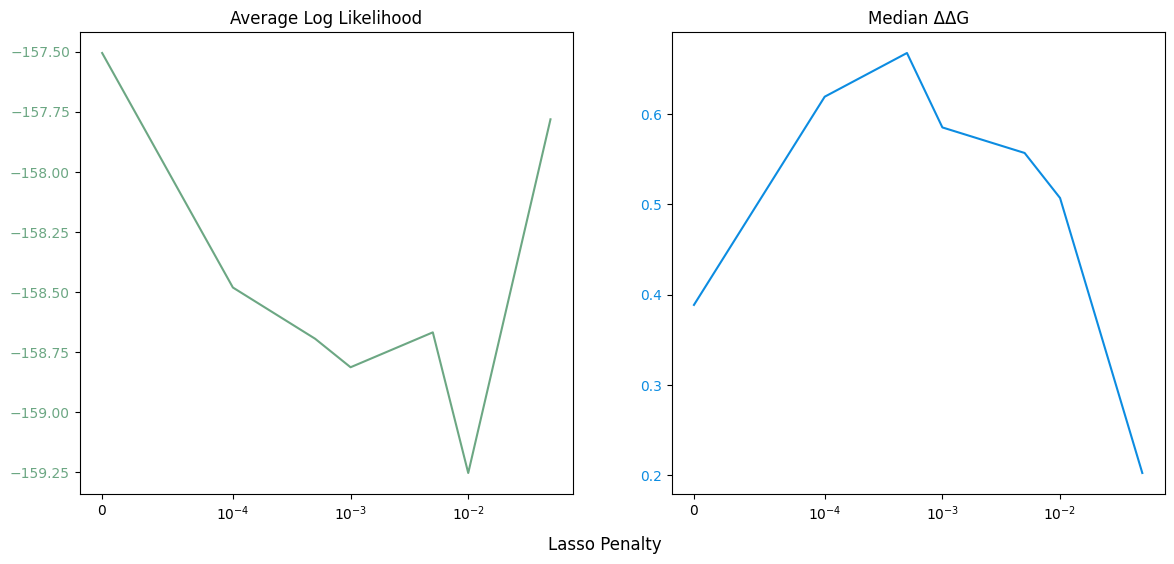

In [26]:
import matplotlib.pyplot as plt

colors = {
    "ll": '#6CA783',   # Green for log-likelihood
    "ddg": '#0C8CE1',  # Blue for ΔΔG
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(lambda_vals, ll_vals, color=colors["ll"], label="Average Log Likelihood")
ax1.tick_params(axis='y', labelcolor=colors["ll"])
ax1.set_xscale('symlog', linthresh=1e-4)
ax1.set_title("Average Log Likelihood")

ax2.plot(lambda_vals, ddg_vals, color=colors["ddg"], label="Median ΔΔG")
ax2.tick_params(axis='y', labelcolor=colors["ddg"])
ax2.set_xscale('symlog', linthresh=1e-4)
ax2.set_title("Median ΔΔG")

fig.supxlabel("Lasso Penalty", fontsize=12)

plt.show()